In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving DATA  ANALYSIS (Responses) (1) (1).xlsx to DATA  ANALYSIS (Responses) (1) (1).xlsx


In [ ]:
df = pd.read_excel('DATA  ANALYSIS (Responses) (1) (1).xlsx')

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Course', 'Year of study ',
       'How much time do you approximately give to study in a day ?',
       'Do you give time for exercise  / yoga / meditation / sports like physical activities?',
       'Do you find time for your hobbies?', 'What makes you more happy ?',
       'Are you satisfied with your life ?',
       'Do you feel any pressure due to your work / study?',
       'What are the major reasons of stress at present?',
       'Have you ever felt this stress is affecting your physical health (such as insomnia, fatigue, headache , nausea , high blood pressure, aches and pains ) ?',
       'Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?',
       'Have you ever felt this is affecting your social life (social withdrawal, social interaction etc ) ?',
       'Have you ever thought of quitting your life because of stress?',
       'Have you ever been to a psycholo

In [ ]:
df.head()

,Timestamp,Age,Gender,Course,Year of study,How much time do you approximately give to study in a day ?,Do you give time for exercise / yoga / meditation / sports like physical activities?,Do you find time for your hobbies?,What makes you more happy ?,Are you satisfied with your life ?,Do you feel any pressure due to your work / study?,What are the major reasons of stress at present?,"Have you ever felt this stress is affecting your physical health (such as insomnia, fatigue, headache , nausea , high blood pressure, aches and pains ) ?","Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness, irritability, anger etc.) ?","Have you ever felt this is affecting your social life (social withdrawal, social interaction etc ) ?",Have you ever thought of quitting your life because of stress?,Have you ever been to a psychologist / doctor for counselling because of stress?,If not do you wish to go to a psycologist / doctor for counselling because of stress ?
0,2022-05-15 10:36:15.429,18.0,Female,Under graduate,1.0,1-2 hour,Yes,Yes,"Family, Friends/relationship, Entertainment, S...",Yes,Yes,"Work/studies, Family, Society",Yes,Yes,Yes,No,No,Yes
1,2022-05-15 10:41:36.886,18.0,Male,Under graduate,1.0,0-1 hour,Yes,Yes,"Family, Friends/relationship",Yes,Yes,"Work/studies, Family",No,Yes,No,No,No,Yes
2,2022-05-15 11:01:35.779,21.0,Male,Under graduate,3.0,2-3 hour,No,No,"Family, Friends/relationship, Work /study",Yes,Yes,Financial problems,Yes,Yes,Yes,No,No,Yes
3,2022-05-15 11:04:04.029,19.0,Female,Under graduate,2.0,0-1 hour,Yes,No,"Friends/relationship, Entertainment",Yes,Yes,Work/studies,No,Yes,Yes,Yes,No,No
4,2022-05-15 11:07:37.700,19.0,Male,Under graduate,2.0,0-1 hour,No,Yes,"Family, Friends/relationship, Entertainment",No,Yes,"Work/studies, Financial problems",No,Yes,Yes,Yes,No,Yes


In [ ]:
pd.get_dummies(df['What are the major reasons of stress at present?']).shape

(314, 106)

In [ ]:
pd.get_dummies(df['What makes you more happy ?']).shape

(314, 50)

In [ ]:



pd.value_counts(df['Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?'])

Yes    209
No     102
Name: Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?, dtype: int64

In [ ]:
df['Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?'].isna().sum()

3

In [ ]:
df.dropna(subset=['Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?'], inplace=True)

In [ ]:
def labelEncode(col):
    print(pd.value_counts(df[col]))
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])

In [ ]:
df.drop(307, inplace=True)

In [ ]:
labelEncode('Gender')
labelEncode('Course')
labelEncode('Do you give time for exercise  / yoga / meditation / sports like physical activities?')
labelEncode('Do you feel any pressure due to your work / study?')
labelEncode('Do you find time for your hobbies?')
labelEncode('Are you satisfied with your life ?')
labelEncode('Have you ever been to a psychologist / doctor for counselling because of stress?')
labelEncode('Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?')
labelEncode('Have you ever felt this is affecting your social life (social withdrawal, social interaction etc ) ?')
labelEncode('Have you ever felt this stress is affecting your physical health (such as insomnia, fatigue, headache , nausea , high blood pressure, aches and pains ) ?')
labelEncode('Have you ever thought of quitting your life because of stress?')
labelEncode('If not do you wish to go to a psycologist / doctor for counselling because of stress ?')

Male      202
Female    106
Name: Gender, dtype: int64
Under graduate    303
Post graduate       5
Name: Course, dtype: int64
Yes    205
No     105
Name: Do you give time for exercise  / yoga / meditation / sports like physical activities?, dtype: int64
Yes    202
No     106
Name: Do you feel any pressure due to your work / study?, dtype: int64
Yes    177
No     133
Name: Do you find time for your hobbies?, dtype: int64
Yes    159
No     149
Name: Are you satisfied with your life ?, dtype: int64
No     292
Yes     16
Name: Have you ever been to a psychologist / doctor for counselling because of stress?, dtype: int64
Yes    209
No     101
Name: Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?, dtype: int64
Yes    158
No     150
Name: Have you ever felt this is affecting your social life (social withdrawal, social interaction etc ) ?, dtype: int64
Yes    168
No     142
Name: Have you ever felt this stress is

In [ ]:
df.head()

,Timestamp,Age,Gender,Course,Year of study,How much time do you approximately give to study in a day ?,Do you give time for exercise / yoga / meditation / sports like physical activities?,Do you find time for your hobbies?,What makes you more happy ?,Are you satisfied with your life ?,Do you feel any pressure due to your work / study?,What are the major reasons of stress at present?,"Have you ever felt this stress is affecting your physical health (such as insomnia, fatigue, headache , nausea , high blood pressure, aches and pains ) ?","Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness, irritability, anger etc.) ?","Have you ever felt this is affecting your social life (social withdrawal, social interaction etc ) ?",Have you ever thought of quitting your life because of stress?,Have you ever been to a psychologist / doctor for counselling because of stress?,If not do you wish to go to a psycologist / doctor for counselling because of stress ?
0,2022-05-15 10:36:15.429,18.0,0,1,1.0,1-2 hour,1,1,"Family, Friends/relationship, Entertainment, S...",1,1,"Work/studies, Family, Society",1,1,1,0,0,1
1,2022-05-15 10:41:36.886,18.0,1,1,1.0,0-1 hour,1,1,"Family, Friends/relationship",1,1,"Work/studies, Family",0,1,0,0,0,1
2,2022-05-15 11:01:35.779,21.0,1,1,3.0,2-3 hour,0,0,"Family, Friends/relationship, Work /study",1,1,Financial problems,1,1,1,0,0,1
3,2022-05-15 11:04:04.029,19.0,0,1,2.0,0-1 hour,1,0,"Friends/relationship, Entertainment",1,1,Work/studies,0,1,1,1,0,0
4,2022-05-15 11:07:37.700,19.0,1,1,2.0,0-1 hour,0,1,"Family, Friends/relationship, Entertainment",0,1,"Work/studies, Financial problems",0,1,1,1,0,1


In [ ]:
df.isna().sum()

Timestamp                                                                                                                                                    0
Age                                                                                                                                                          0
Gender                                                                                                                                                       0
Course                                                                                                                                                       0
Year of study                                                                                                                                                6
How much time do you approximately give to study in a day ?                                                                                                  1
Do you give time for exercise  / yoga / medita

In [ ]:
df.isna().sum()

Timestamp                                                                                                                                                    0
Age                                                                                                                                                          0
Gender                                                                                                                                                       0
Course                                                                                                                                                       0
Year of study                                                                                                                                                6
How much time do you approximately give to study in a day ?                                                                                                  1
Do you give time for exercise  / yoga / medita

In [ ]:
mean_exercise=df['Do you give time for exercise  / yoga / meditation / sports like physical activities?'].mean()
df['Do you give time for exercise  / yoga / meditation / sports like physical activities?'].fillna(value=mean_exercise,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [1]:
dummies_1 = pd.get_dummies(df['What are the major reasons of stress at present?'])
dummies_2 = pd.get_dummies(df['What makes you more happy ?'])

NameError: name 'pd' is not defined

In [ ]:
X = df.values
y = df['Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?'].values

In [ ]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
df.drop(columns=['Timestamp','What are the major reasons of stress at present?',
                'What makes you more happy ?',
                'How much time do you approximately give to study in a day ?',
                'Have you ever felt this is affecting your mental health ( confusions, anxiety , feelings of sadness,  irritability, anger etc.) ?'], inplace=True)

In [ ]:
dummies_1 = dummies_1.values
dummies_2 = dummies_2.values

In [ ]:
mean_year=df['Year of study '].mean()
df['Year of study '].fillna(value=mean_year,inplace=True)

In [ ]:
df.isna().sum()

Age                                                                                                                                                          0
Gender                                                                                                                                                       0
Course                                                                                                                                                       0
Year of study                                                                                                                                                0
Do you give time for exercise  / yoga / meditation / sports like physical activities?                                                                        0
Do you find time for your hobbies?                                                                                                                           0
Are you satisfied with your life ?            

In [ ]:
df.columns

Index(['Age', 'Gender', 'Course', 'Year of study ',
       'Do you give time for exercise  / yoga / meditation / sports like physical activities?',
       'Do you find time for your hobbies?',
       'Are you satisfied with your life ?',
       'Do you feel any pressure due to your work / study?',
       'Have you ever felt this stress is affecting your physical health (such as insomnia, fatigue, headache , nausea , high blood pressure, aches and pains ) ?',
       'Have you ever felt this is affecting your social life (social withdrawal, social interaction etc ) ?',
       'Have you ever thought of quitting your life because of stress?',
       'Have you ever been to a psychologist / doctor for counselling because of stress?',
       'If not do you wish to go to a psycologist / doctor for counselling because of stress ?'],
      dtype='object')

In [ ]:
X = np.c_[df, dummies_1, dummies_2]

In [ ]:
X[0]

array([18.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
len(X[0])

167

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=500)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_prediction=clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_prediction)

0.8918918918918919

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
confusion_matrix(y_test, y_prediction)

array([[16,  3],
       [ 5, 50]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.94      0.91      0.93        55

    accuracy                           0.89        74
   macro avg       0.85      0.88      0.86        74
weighted avg       0.90      0.89      0.89        74



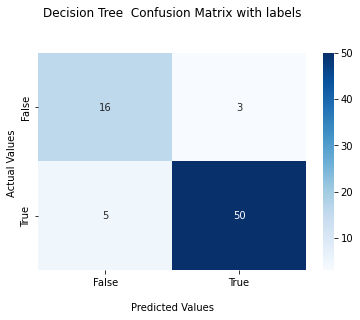

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test, y_prediction)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Decision Tree  Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Feature: 0, Score: 0.21525
Feature: 1, Score: 0.11883
Feature: 2, Score: 0.07160
Feature: 3, Score: 0.06652
Feature: 4, Score: 0.04847
Feature: 5, Score: 0.03773
Feature: 6, Score: 0.03475
Feature: 7, Score: 0.03214
Feature: 8, Score: 0.02500
Feature: 9, Score: 0.02472
Feature: 10, Score: 0.02177
Feature: 11, Score: 0.02131
Feature: 12, Score: 0.01965
Feature: 13, Score: 0.01870
Feature: 14, Score: 0.01868
Feature: 15, Score: 0.01790
Feature: 16, Score: 0.01786
Feature: 17, Score: 0.01764
Feature: 18, Score: 0.01669
Feature: 19, Score: 0.01661
Feature: 20, Score: 0.01538
Feature: 21, Score: 0.01484
Feature: 22, Score: 0.01391
Feature: 23, Score: 0.01307
Feature: 24, Score: 0.01230
Feature: 25, Score: 0.01159
Feature: 26, Score: 0.01021
Feature: 27, Score: 0.01021
Feature: 28, Score: 0.00995
Feature: 29, Score: 0.00960
Feature: 30, Score: 0.00932
Feature: 31, Score: 0.00783
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

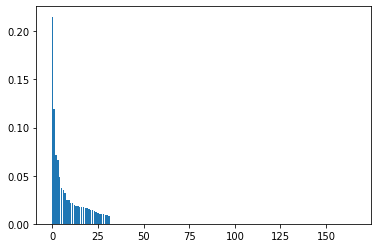

In [ ]:
from matplotlib import pyplot
importance = clf.feature_importances_
# summarize feature importance
importance=sorted(importance,reverse=True)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
importance

[0.21525337923653387,
 0.11883044521598918,
 0.0716019353873062,
 0.06652469903926209,
 0.04847384389077871,
 0.03772804197250713,
 0.03474918393913802,
 0.03213838135617072,
 0.025002298427875335,
 0.024718825656584228,
 0.021770708835156756,
 0.02130839648537541,
 0.019647892487108413,
 0.01869537496514987,
 0.01867775886671667,
 0.017895759300638362,
 0.017858784591339525,
 0.017640105596343547,
 0.016686586374919574,
 0.016610632173747013,
 0.015380214975691675,
 0.014835684649764064,
 0.013908454359153827,
 0.01306551773132631,
 0.012296957864777714,
 0.011594274558218999,
 0.010205019766479728,
 0.010205019766479728,
 0.009946664835682769,
 0.009604724486098563,
 0.009317626743307583,
 0.007826806464378357,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 313
Data columns (total 13 columns):
 #   Column                                                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                                                     --------------  -----  
 0   Age                                                                                                                                                        296 non-null    float64
 1   Gender                                                                                                                                                     296 non-null    int64  
 2   Course                                                                                                                                                    

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_prediction)

0.8918918918918919

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
# target_names=target_names
print(classification_report(y_test,y_pred))

[[ 0 19]
 [ 0 55]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.74      1.00      0.85        55

    accuracy                           0.74        74
   macro avg       0.37      0.50      0.43        74
weighted avg       0.55      0.74      0.63        74



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


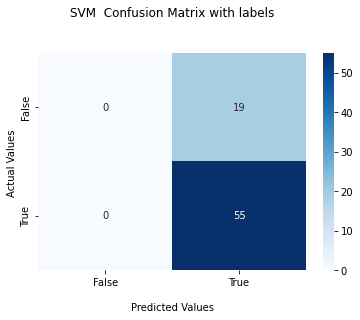

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('SVM  Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [ ]:

y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8648648648648649

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
# target_names=target_names
print(classification_report(y_test,y_pred))

[[13  6]
 [ 4 51]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.89      0.93      0.91        55

    accuracy                           0.86        74
   macro avg       0.83      0.81      0.82        74
weighted avg       0.86      0.86      0.86        74



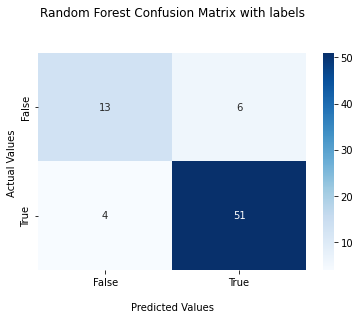

In [ ]:


import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
target_names = ['class 0', 'class 1']
print(classification_report(y_test,y_pred,target_names=target_names))

[[13  6]
 [ 4 51]]
              precision    recall  f1-score   support

     class 0       0.76      0.68      0.72        19
     class 1       0.89      0.93      0.91        55

    accuracy                           0.86        74
   macro avg       0.83      0.81      0.82        74
weighted avg       0.86      0.86      0.86        74



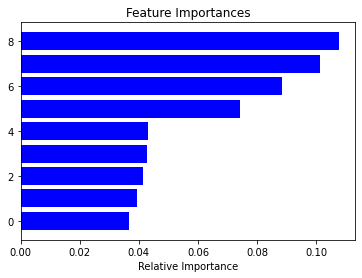

In [ ]:
import matplotlib.pyplot as plt
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8513513513513513

In [ ]:

y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_prediction)

0.8918918918918919

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

[[15  4]
 [ 7 48]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.92      0.87      0.90        55

    accuracy                           0.85        74
   macro avg       0.80      0.83      0.81        74
weighted avg       0.86      0.85      0.85        74



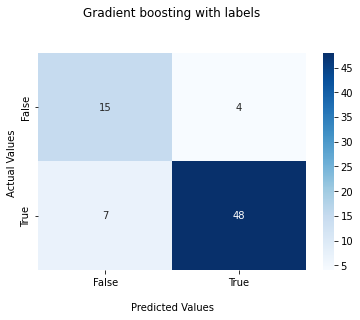

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Gradient boosting with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=0.01,
                    hidden_layer_sizes=(6, 4), random_state=100)

clf.fit(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(6, 4), random_state=100,
              solver='lbfgs')

In [ ]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9864864864864865

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
target_names = ['class 0', 'class 1']
print(classification_report(y_test,y_pred))

[[19  0]
 [ 1 54]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.98      0.99        55

    accuracy                           0.99        74
   macro avg       0.97      0.99      0.98        74
weighted avg       0.99      0.99      0.99        74



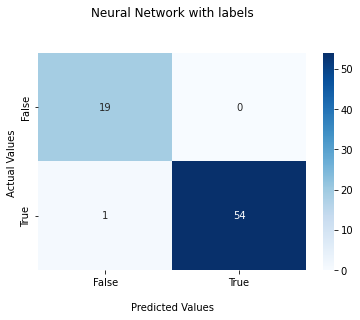

In [ ]:

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Neural Network with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
y_train

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1])

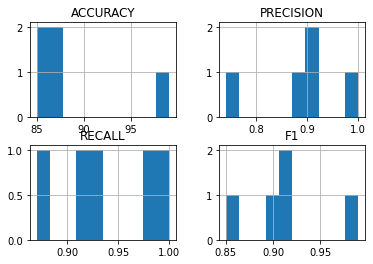

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create 2D array of table given above
data = [[86 ,0.91	,0.91 ,	0.91],
        [86.4,	.74 ,	1	,.85],
        [86.4,	.89,	.93,	.91],
        [85,	.92,	.87,	.90],
        [99,	1	,.98,	.99],
      ]

# dataframe created with
# the above data array
df = pd.DataFrame(data, columns = ['ACCURACY', 'PRECISION',
                                    'RECALL', 'F1'] )

# create histogram for numeric data
df.hist()

# show plot
plt.show()







Text(0, 0.5, 'Ratings')

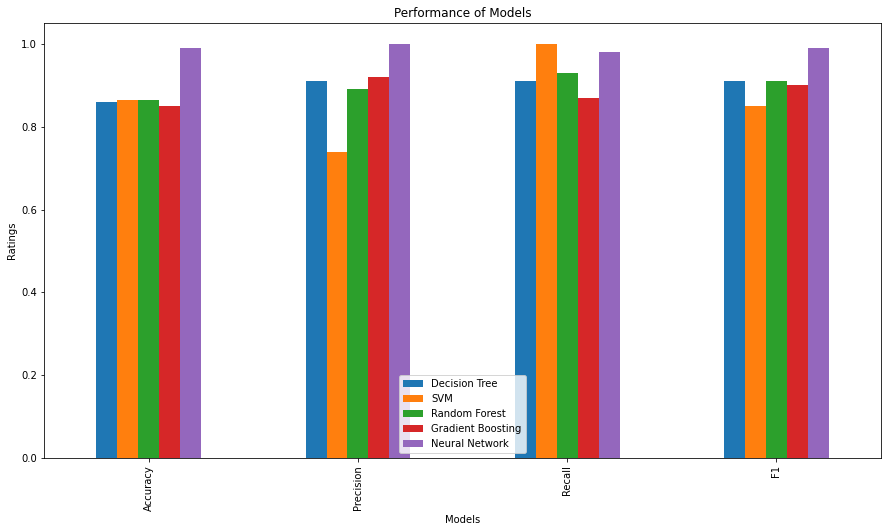

In [ ]:
import pandas as pd

plotdata = pd.DataFrame({

    "Decision Tree":[.86 ,0.91	,0.91 ,	0.91],

    "SVM":[.864,	.74 ,	1	,.85],

    "Random Forest":[.864,	.89,	.93,	.91],
     "Gradient Boosting":[.85,	.92,	.87,	.90],
      "Neural Network":[.99,	1	,.98,	.99]
    },

    index=["Accuracy", "Precision", "Recall", "F1"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Performance of Models")

plt.xlabel("Models")

plt.ylabel("Ratings")